In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

Dataset contains 12 Features including target variable quality

In [5]:
#lets check the data type for feature 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All features are either int or float data type

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.duplicated().sum()

240

# There are 240 duplicated entries out of 1599

In [8]:
df=df.drop_duplicates(keep='first')

In [9]:
df.shape

(1359, 12)

There are no null values and duplicates have been removed

# Exploratory Data Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
# univariate Data Analysis
df["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

quality above 6.5 is a good quality

<AxesSubplot:xlabel='quality', ylabel='count'>

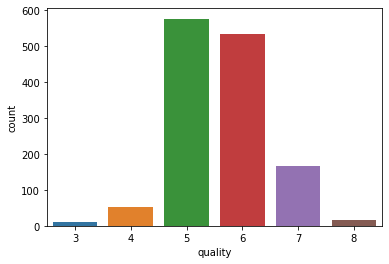

In [14]:
sns.countplot(x=df['quality'])

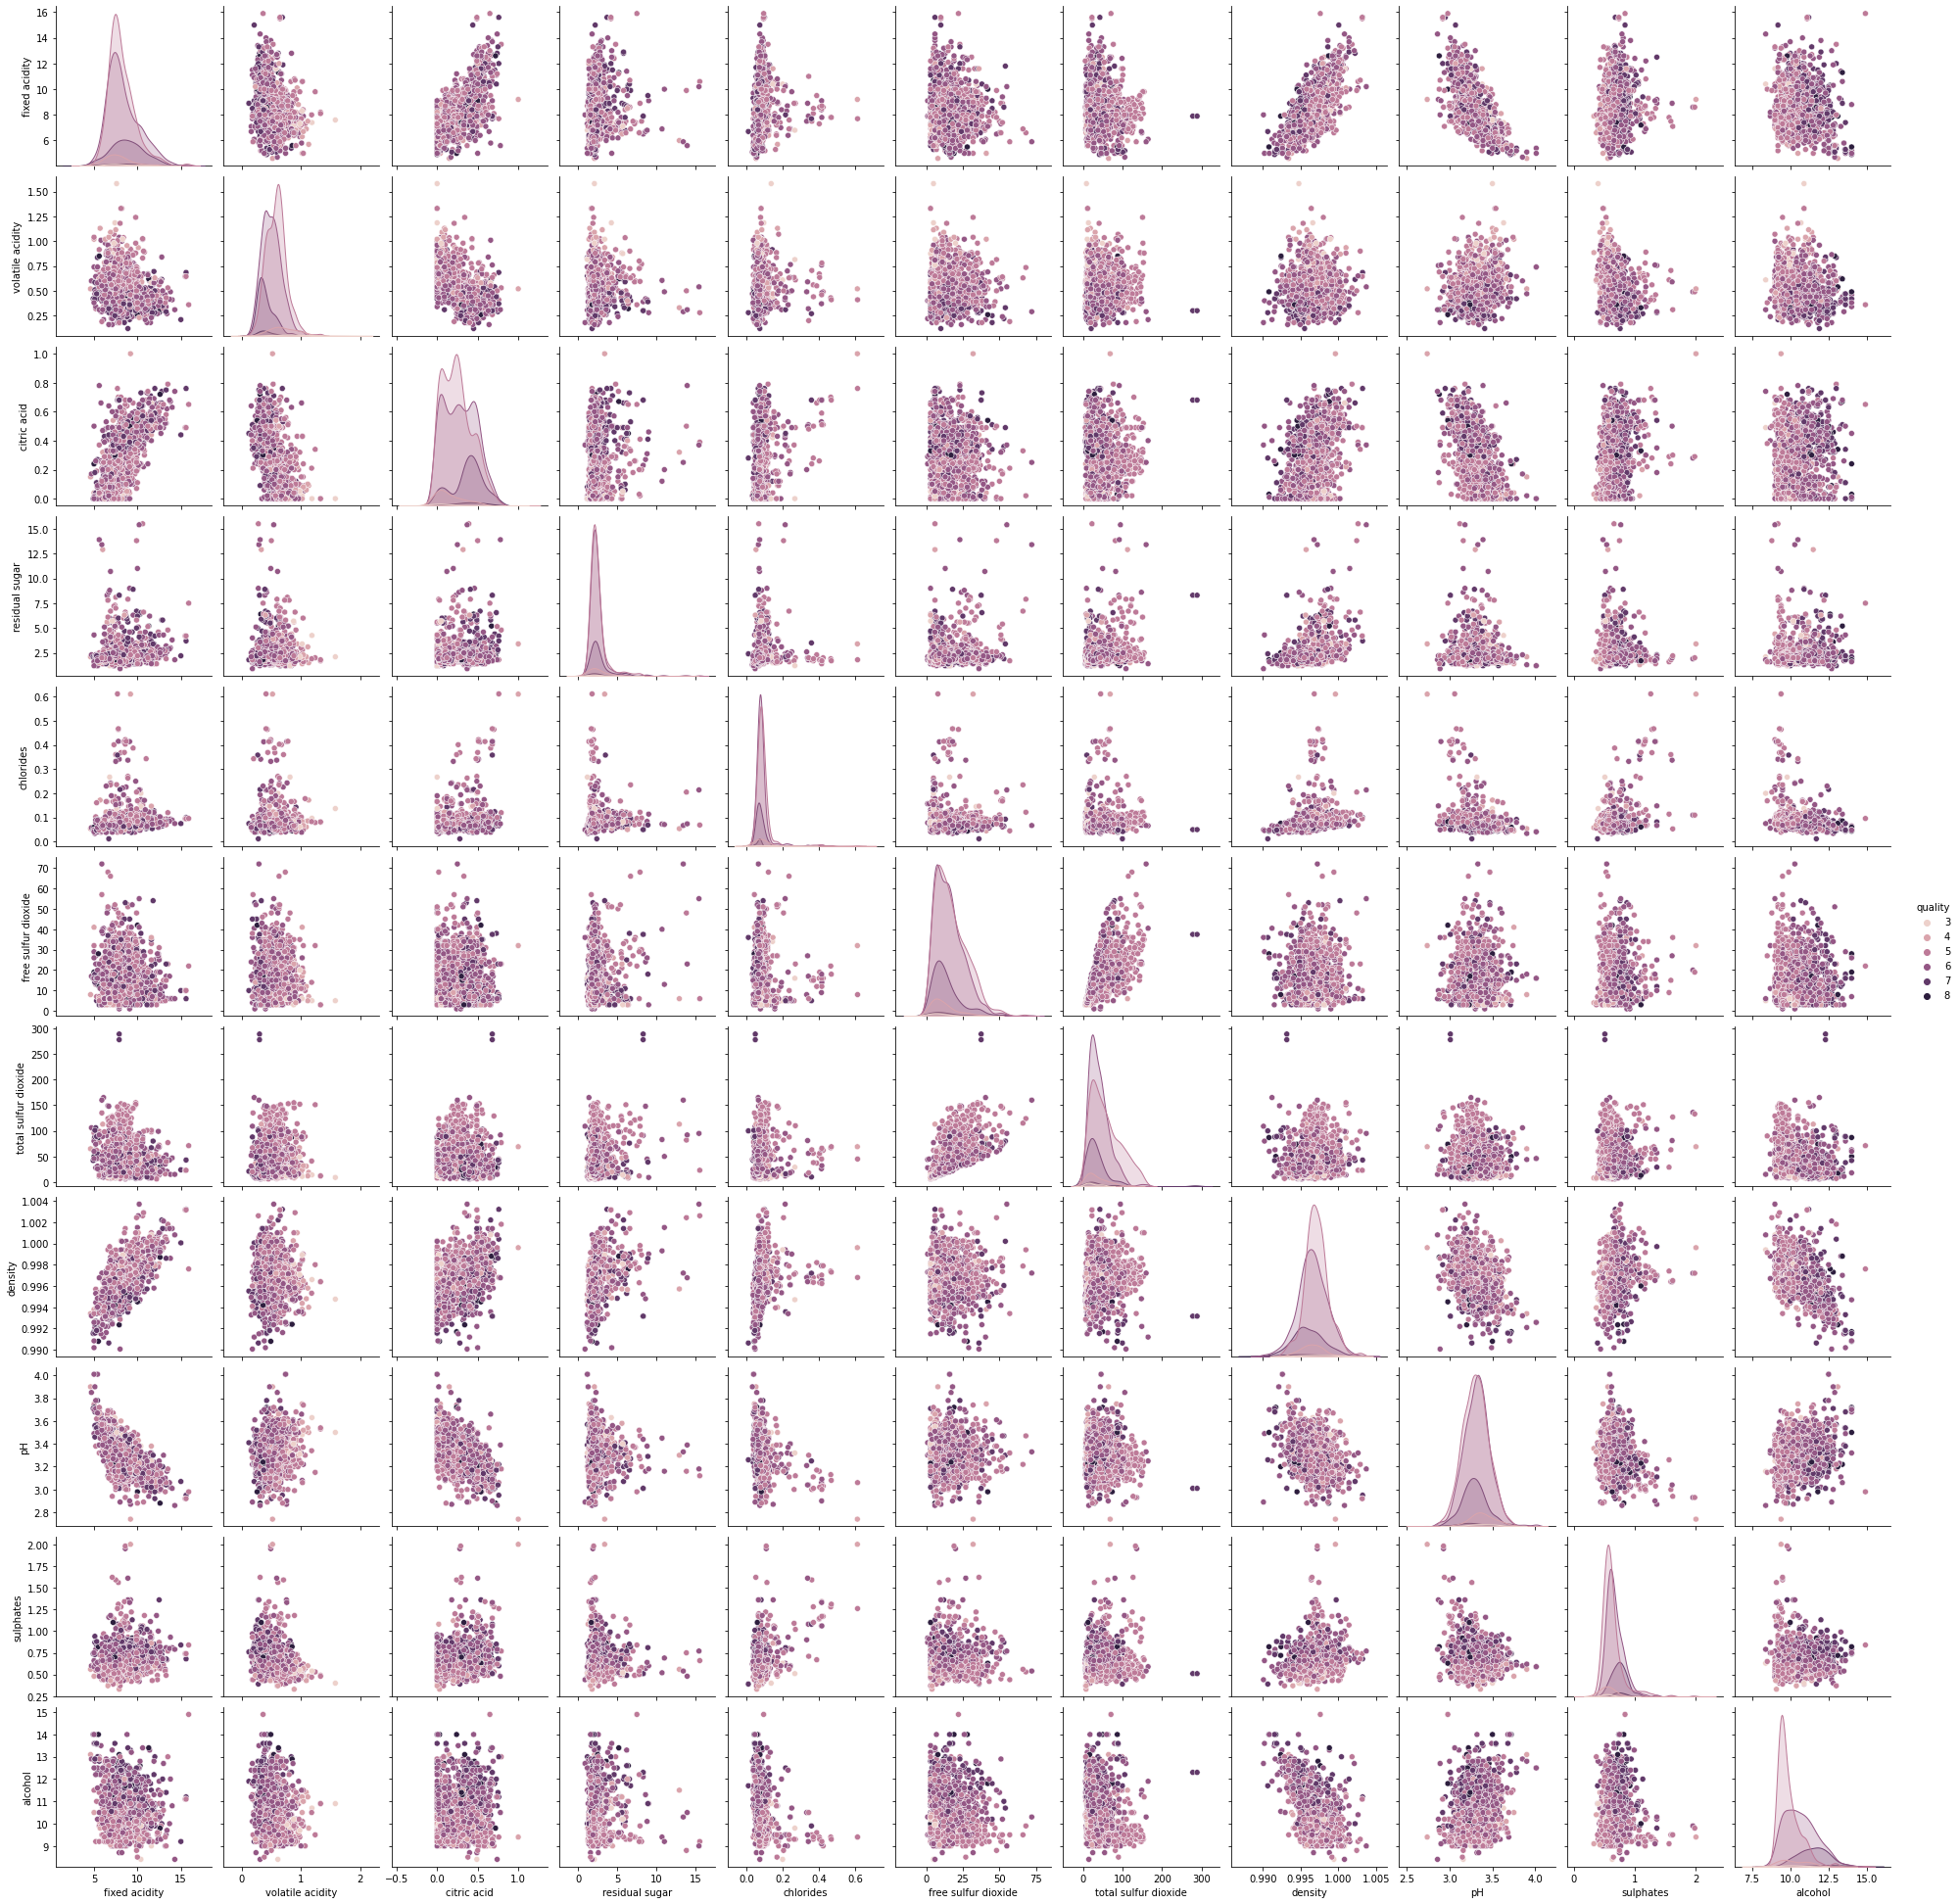

In [16]:
sns.pairplot(df, hue='quality')

<AxesSubplot:>

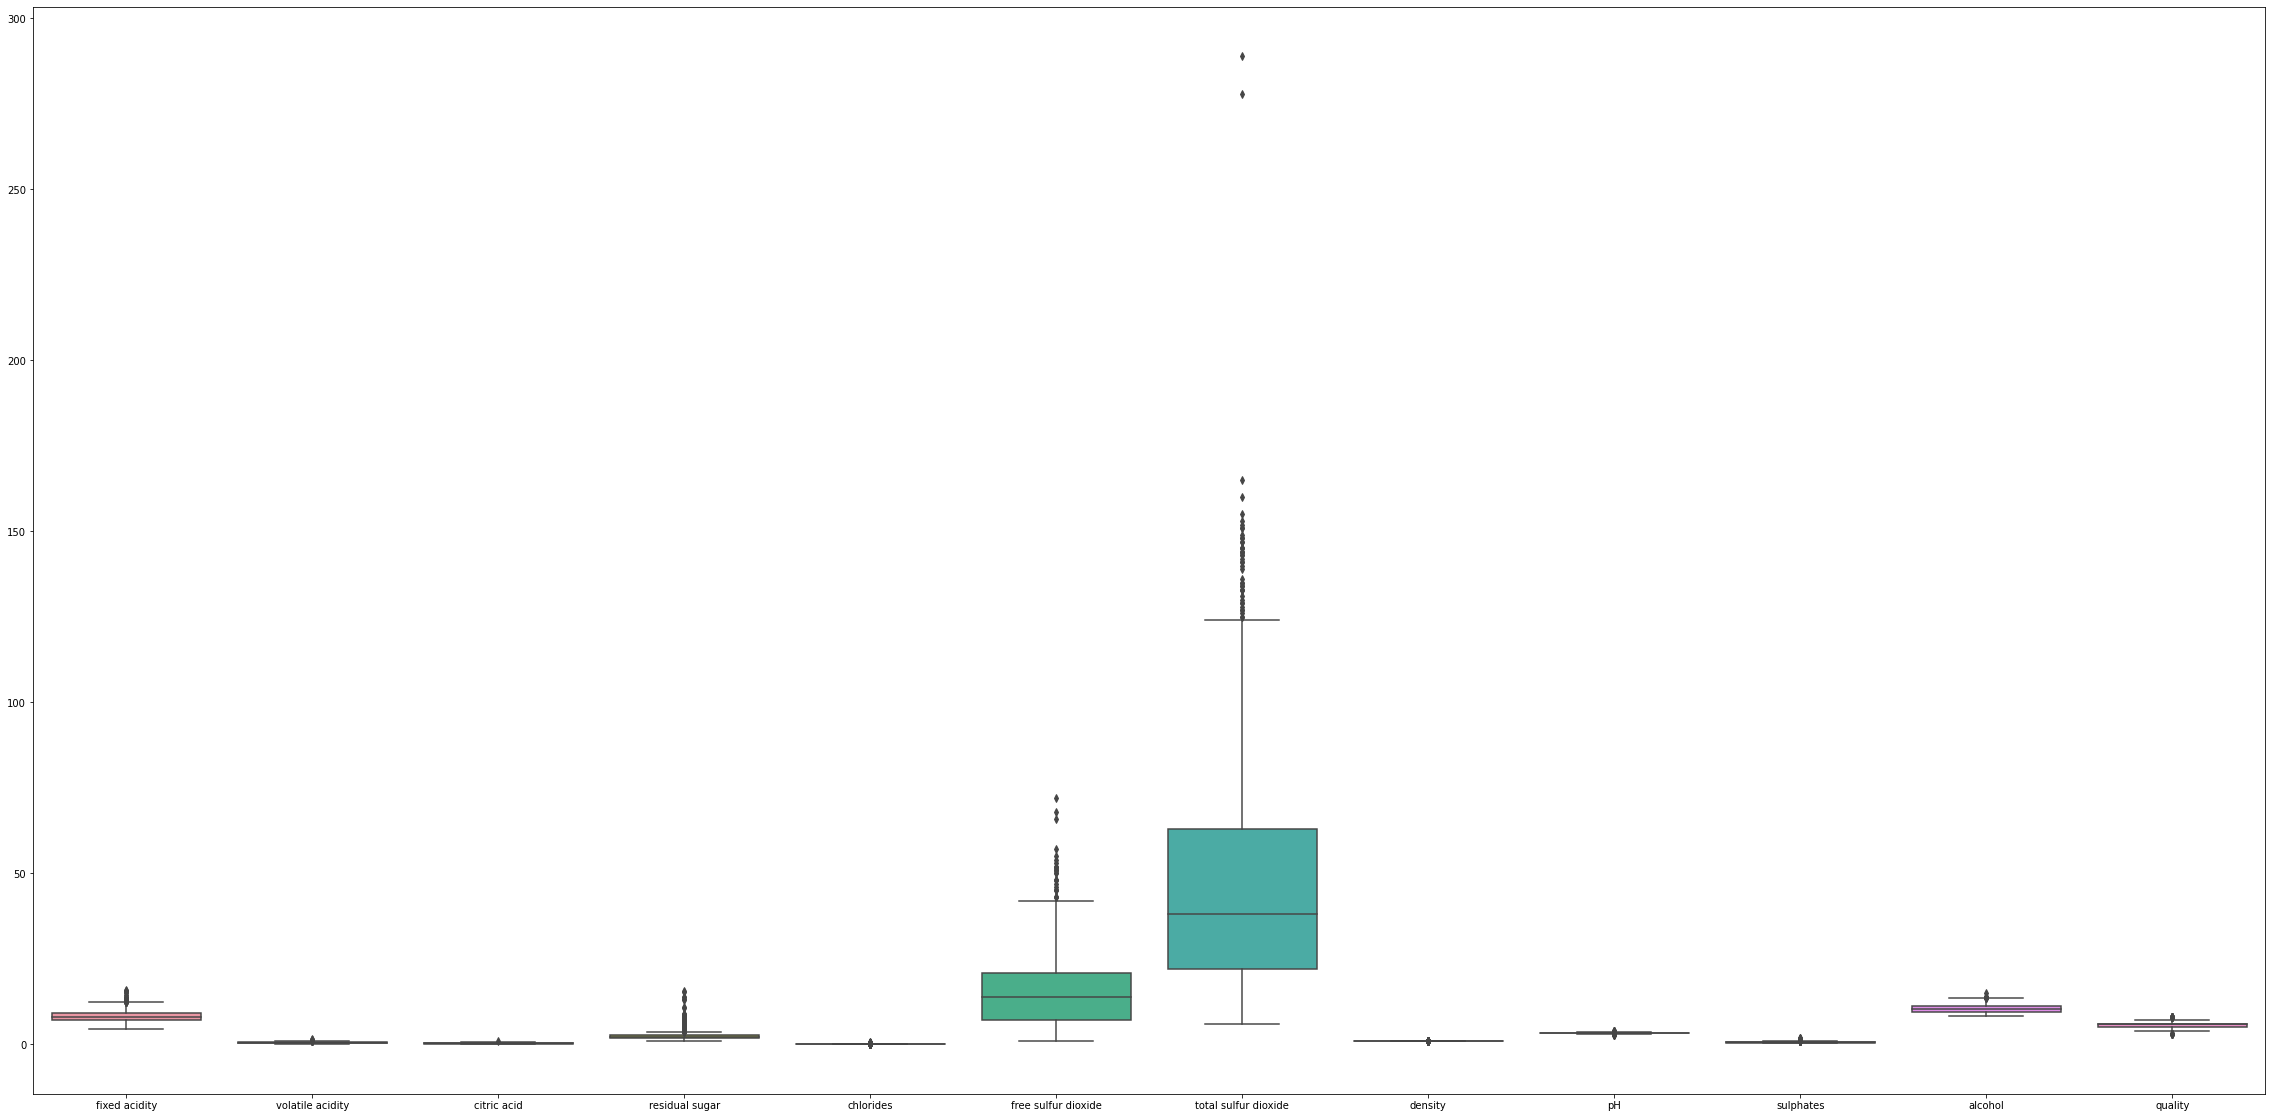

In [17]:
# Remove outliers
plt.figure(figsize=(40,20))
sns.boxplot(data = df)

In [18]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR = q3-q1

In [21]:
df=df[~((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]

dataset after outlier removal

<AxesSubplot:>

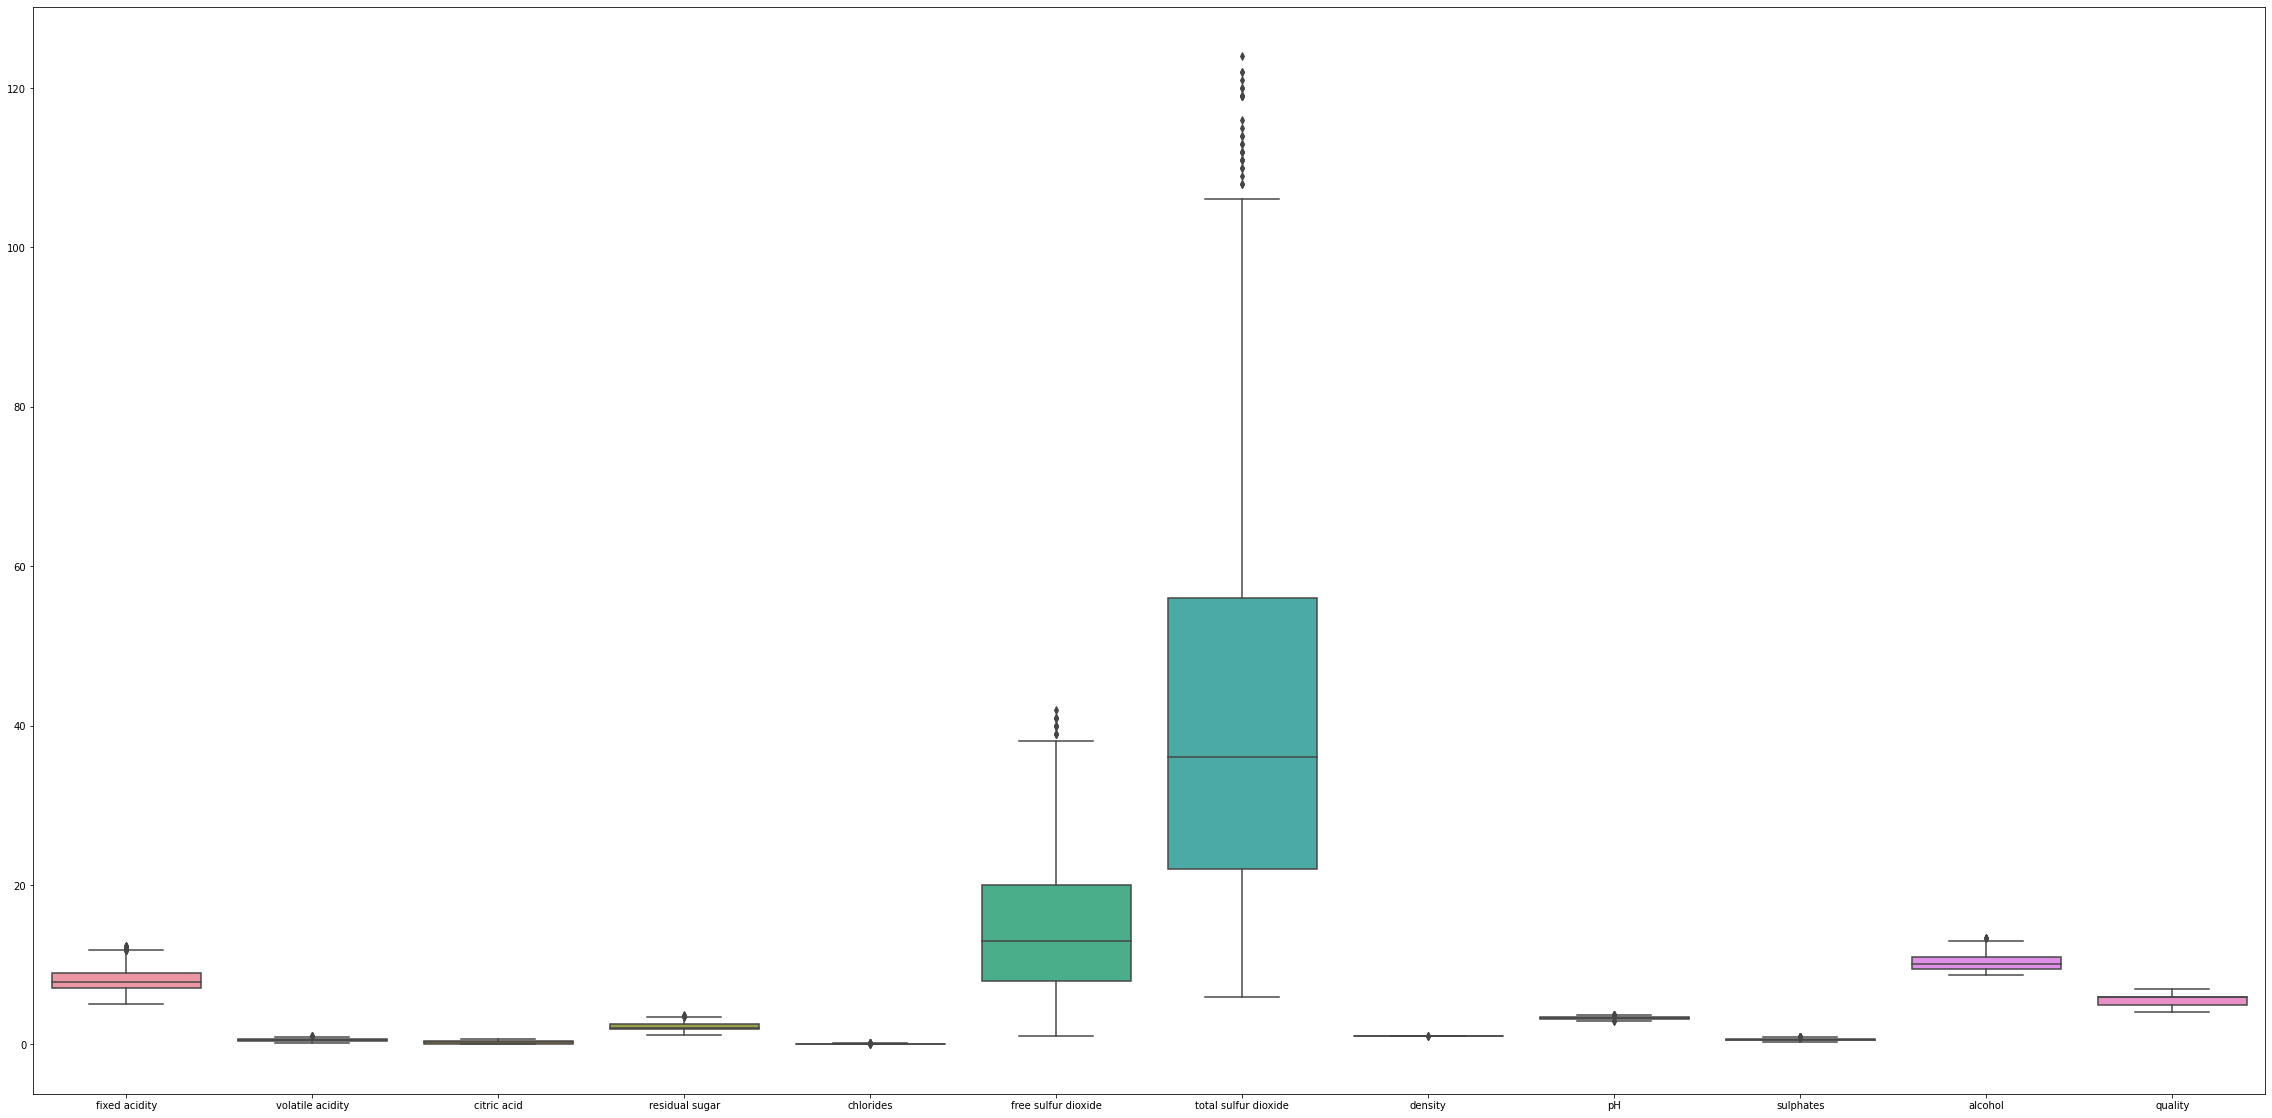

In [23]:
plt.figure(figsize=(40,20))
sns.boxplot(data=df)

Standardize and Label Encoding

In [24]:
def cat(x):
    if x>6.5:
        return 'good'
    else:
        return 'poor'

In [25]:
df['rating']=df['quality'].apply(lambda x :cat(x))

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,poor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,poor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,poor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,poor
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,poor


In [27]:
X=df.drop(labels=['quality','rating'], axis=1)
y=df['rating']

In [30]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
y_encode=encode.fit_transform(y)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X= scaler.fit_transform(X)

Train and Test split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encode, test_size=0.33, random_state=42) 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def fit_predict(model1):
    model=model1
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("Accuracy score:{}".format(accuracy_score(y_test,y_pred)))
    print("classification report\n")
    print(classification_report(y_test,y_pred))
    print("\n")
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
    print("\n")
    print("{} model has accuarcy of {}".format(str(model), accuracy_score(y_test,y_pred)))
    return model

# Logistic Regression

Accuracy score:0.8885542168674698
classification report

              precision    recall  f1-score   support

           0       0.62      0.31      0.41        42
           1       0.91      0.97      0.94       290

    accuracy                           0.89       332
   macro avg       0.76      0.64      0.68       332
weighted avg       0.87      0.89      0.87       332





LogisticRegression() model has accuarcy of 0.8885542168674698


LogisticRegression()

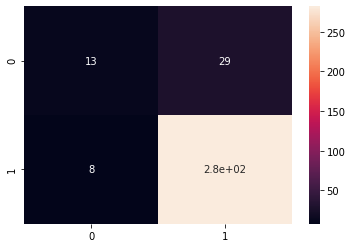

In [37]:
fit_predict(LogisticRegression())

# KNeighbourClassifier

Accuracy score:0.7801204819277109
classification report

              precision    recall  f1-score   support

           0       0.29      0.52      0.38        42
           1       0.92      0.82      0.87       290

    accuracy                           0.78       332
   macro avg       0.61      0.67      0.62       332
weighted avg       0.84      0.78      0.80       332





KNeighborsClassifier(n_neighbors=2) model has accuarcy of 0.7801204819277109


KNeighborsClassifier(n_neighbors=2)

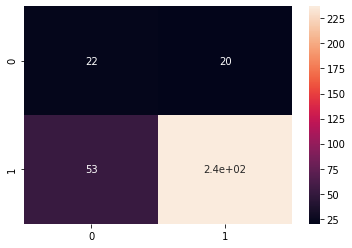

In [38]:
fit_predict(KNeighborsClassifier(n_neighbors=2))

Accuracy score:0.9006024096385542
classification report

              precision    recall  f1-score   support

           0       0.91      0.24      0.38        42
           1       0.90      1.00      0.95       290

    accuracy                           0.90       332
   macro avg       0.90      0.62      0.66       332
weighted avg       0.90      0.90      0.87       332





SVC() model has accuarcy of 0.9006024096385542


SVC()

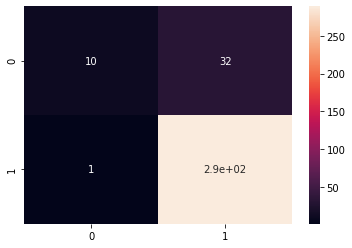

In [39]:
from sklearn.svm import SVC
fit_predict(SVC())

# Decision Tree

Accuracy score:0.8554216867469879
classification report

              precision    recall  f1-score   support

           0       0.41      0.31      0.35        42
           1       0.90      0.93      0.92       290

    accuracy                           0.86       332
   macro avg       0.65      0.62      0.63       332
weighted avg       0.84      0.86      0.85       332





DecisionTreeClassifier() model has accuarcy of 0.8554216867469879


DecisionTreeClassifier()

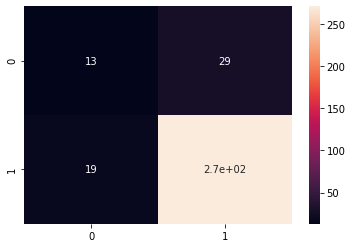

In [40]:
from sklearn.tree import DecisionTreeClassifier
fit_predict(DecisionTreeClassifier())

Accuracy score:0.8132530120481928
classification report

              precision    recall  f1-score   support

           0       0.28      0.31      0.30        42
           1       0.90      0.89      0.89       290

    accuracy                           0.81       332
   macro avg       0.59      0.60      0.59       332
weighted avg       0.82      0.81      0.82       332





DecisionTreeClassifier() model has accuarcy of 0.8132530120481928


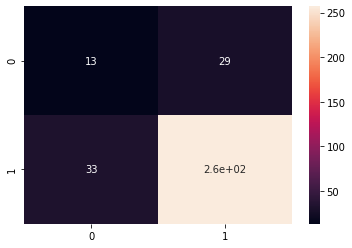

In [41]:
from sklearn import tree
model=fit_predict(DecisionTreeClassifier())

[Text(1005.6421232876713, 3125.7, 'X[10] <= 0.593\ngini = 0.193\nsamples = 673\nvalue = [73, 600]'),
 Text(467.22945205479454, 2853.8999999999996, 'X[0] <= 0.939\ngini = 0.078\nsamples = 494\nvalue = [20, 474]'),
 Text(170.07534246575344, 2582.1, 'X[3] <= -2.105\ngini = 0.044\nsamples = 404\nvalue = [9, 395]'),
 Text(61.15068493150685, 2310.2999999999997, 'X[10] <= -0.48\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(30.575342465753426, 2038.4999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(91.72602739726028, 2038.4999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(279.0, 2310.2999999999997, 'X[9] <= -0.132\ngini = 0.039\nsamples = 402\nvalue = [8, 394]'),
 Text(152.87671232876713, 2038.4999999999998, 'X[10] <= 0.082\ngini = 0.008\nsamples = 250\nvalue = [1, 249]'),
 Text(122.3013698630137, 1766.6999999999998, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(183.45205479452056, 1766.6999999999998, 'X[2] <= -1.292\ngini = 0.056\nsamples = 35\nvalue = 

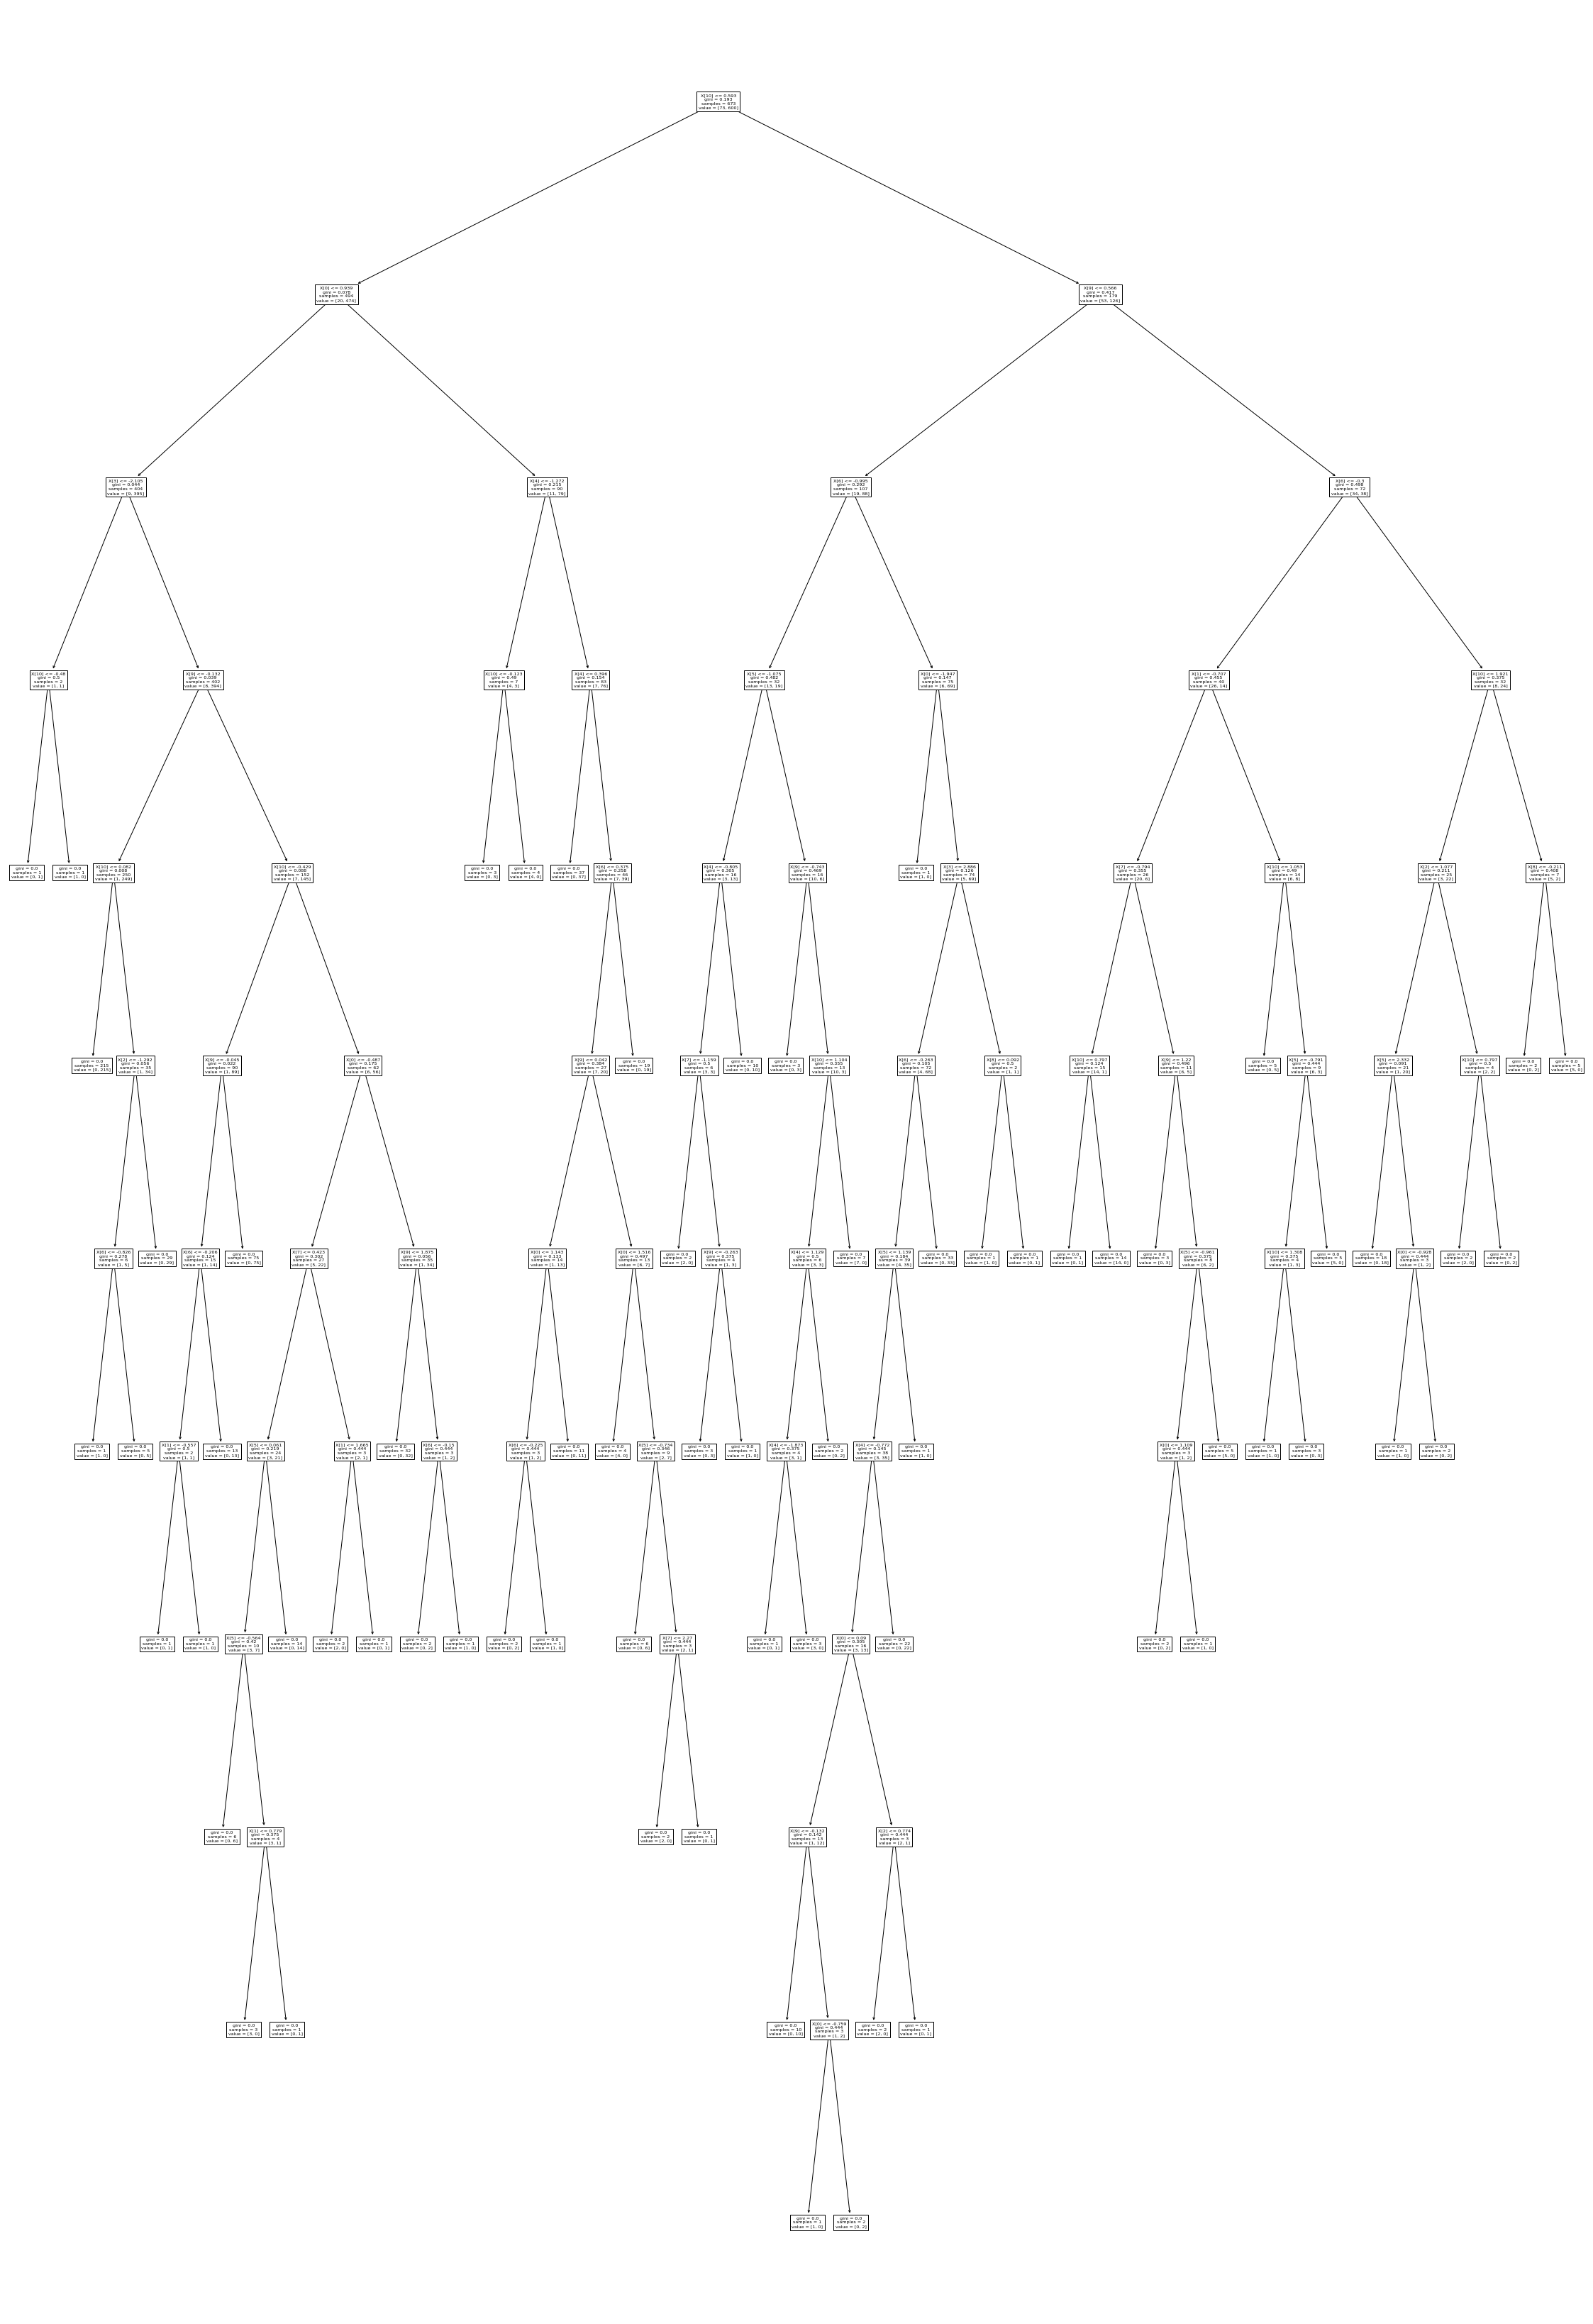

In [42]:
plt.figure(figsize=(40,60))
tree.plot_tree(model)